In [37]:
%load_ext autoreload
%autoreload 2

In [1]:
# %load "/Users/haleighwright/Desktop/NCEAS/pyriv/notebooks/nb_config.py"
import sys
sys.path.append("/Users/haleighwright/Desktop/NCEAS/pyriv")
sys.path.append("/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages")
import networkx as nx
import numpy as np
import sys
import geopandas as gpd
import seaborn # makes matplotlib graphs look prettier
from shapely.geometry import Point
from multiprocessing import Pool

from pyriv import graph_prep as GraphBuilder
from pyriv import river_graph as RiverGraph
from pyriv import snapping_processor as SnapTool

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # makes matplotlib graphs 2x resolution for retina display

In [21]:
from pyriv import point_processor as PointProcessor

In [2]:
import pylab as plt

In [3]:
%pwd

u'/Users/haleighwright/Desktop/NCEAS/pyriv/notebooks/dev/Experimental'

In [5]:
#ak = GraphBuilder.read_from_file('../../../../Data/sasap/NatMapCoastline3338/NatMapGDF/NatMapGDF.shp')

In [4]:
%%time
ak = GraphBuilder.read_from_file('ak.gpickle')

Weighting Edges with Distances
CPU times: user 1min 14s, sys: 11.8 s, total: 1min 25s
Wall time: 1min 27s


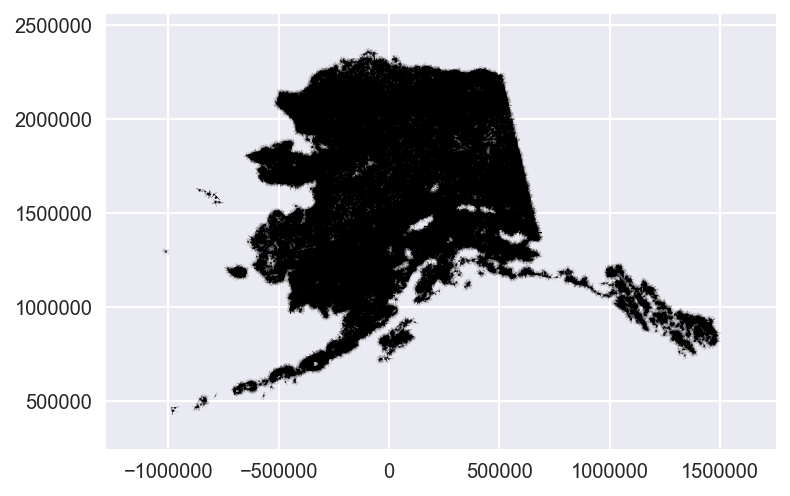

In [4]:
ak.plot()

In [21]:
in_degrees = ak.in_degree() # dictionary node:degree
in_values = sorted(set(in_degrees.values()))
in_hist = [in_degrees.values().count(x) for x in in_values]

In [22]:
out_degrees = ak.out_degree() # dictionary node:degree
out_values = sorted(set(out_degrees.values()))
out_hist = [out_degrees.values().count(x) for x in out_values]

In [23]:
plt.figure()
plt.plot(in_values,in_hist,'ro-') # in-degree
plt.plot(out_values,out_hist,'bv-') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Alaskan River Network')
plt.savefig('ak_degree_distribution.pdf')
plt.close()

In [30]:
print out_values
print out_hist

[0, 1, 2]
[2262, 415776, 82]


In [32]:
print in_values
print in_hist

[0, 1, 2, 3]
[16465, 387374, 14277, 4]


In [3]:
%%time
ak_snapped = SnapTool.snapped_graph(ak, 0.75, 'ak_highres_snapped.shp')

AssertionError: graph is not a digraph

In [16]:
print ak.copy

<bound method RiverGraph.copy of <pyriv.river_graph.RiverGraph object at 0x10a8aefd0>>


In [11]:
graph_copy = ak.copy()
print len(graph_copy.edges())

415940


In [14]:
print len(ak.nodes())

418120


In [12]:
%%time
allnodes_missingedges = SnapTool.missing_edges_list(ak, 0.75, 'ak_highres_snapped.shp')

<class 'pyriv.river_graph.RiverGraph'>
CPU times: user 1min 19s, sys: 22.7 s, total: 1min 41s
Wall time: 10min 45s


In [26]:
print allnodes_missingedges[1]
print allnodes_missingedges[0][199060]
print allnodes_missingedges[0][268660]
pts = {1:allnodes_missingedges[0][199060],2:allnodes_missingedges[0][268660]}

[[199060, 268660], [268660, 199060]]
(-682747.8977132862, 542724.0259980412)
(-682747.9017629927, 542724.0249572785)


In [27]:
pts.values()

[(-682747.8977132862, 542724.0259980412),
 (-682747.9017629927, 542724.0249572785)]

In [28]:
SnapTool.missing_edges_to_shp(pts, 'missing_pts.shp', 'epsg:3338')

In [13]:
%%time
SnapTool.add_missing_edges(graph_copy, allnodes_missingedges[1], allnodes_missingedges[0])

CPU times: user 190 µs, sys: 3.45 ms, total: 3.64 ms
Wall time: 46.6 ms


In [16]:
print len(graph_copy.edges())

415942


In [17]:
GraphBuilder.write_shp(graph_copy, 'ak_highres_snapped.shp')

made directory


KeyboardInterrupt: 

In [39]:
%pwd

u'/Users/haleighwright/Desktop/NCEAS/pyriv/notebooks/dev/Experimental'

In [9]:
print len(ak.edges())
print type(ak_snapped)
print len(ak_snapped.edges())

415940
<type 'NoneType'>


AttributeError: 'NoneType' object has no attribute 'edges'

In [6]:
test = GraphBuilder.read_from_file('../../../tests/testdata/test.gpickle')

Weighting Edges with Distances


In [7]:
test_copy = test.copy()

In [8]:
print type(test_copy)

<class 'pyriv.river_graph.RiverGraph'>


In [9]:
%%time
allnodes_missingedges = SnapTool.missing_edges_list(test_copy, 0.75,'poop.shp')

<class 'pyriv.river_graph.RiverGraph'>
CPU times: user 20.2 ms, sys: 106 ms, total: 126 ms
Wall time: 254 ms


In [10]:
allnodes_missingedges

({0: (-335902.9307116249, 1126635.700335683),
  1: (-335296.10864771187, 1125076.8999078558),
  2: (-335850.5894843675, 1126651.7326361765)},
 [])